# UNCHR - ML Challenge
Jamie Hackney, Mihir Singh, Jake Gilbert

## Abstract
This project seeks to develop, implement, and evaluate various machine learning models to accurately predict refugee population movements in Somalia as part of the United Nations Commissioner for Refugees (UNHCR) Machine Learning Challenge. The data used by our models' was collected by the UNHCR between 2015 and 2024 in Somalia. It contains information on population movements, markets, health, conflicts, and climate. We developed a web scraper to collect this data and combine it all into a single dataframe. To deal with missing data values, we created two datasets, one by dropping the missing values and the other by imputing them. Then, we built a Logistic Regression, Decision Tree, and Random Forest model on different subsets of these two datasets. We tested these models to see how accurately they could predict the number of refugee arrivals into a specific district in Somalia by computing the root mean squared error (RMSE), framing it as a regression problem. We found that the models had, on average, very high root mean squared errors (indicating a poor fit on the data), yet also had high R<sup>2</sup> values (indicating a good fit on the data). We believe this discrepancy is explained by the fact that there are several very large outliers present in the data. To validate this, we binned the predictions into the three severity levels proposed by the UN, and treated it as a classification problem. When doing so, our best model, a Decision Tree Regressor trained on a subset of the dataset where missing features were dropped, achieved an accuracy of 99.5%. This model was also able to perfectly predict the exact number of arrivals 98% of the time, further supporting our hypothesis that these models fit the data very well and the high RMSE is explained by the existence of several large outliers.

## Values Statement
The intended users of our project are the Somalian government and other NGOs that support refugees in the area. However, our project deals directly with people, as we are predicting where we expect refugees to move in Somalia. Because of this, the entire population of refugees in Somalia could potentially be affected by our project, if it were to be used by any of these agencies or governments to inform resource allocations. Both refugees in Somalia and the groups that support these refugees stand to benefit from our project, assuming the models are an effective tool. If this is the case, then these agencies can better allocate resources, which will benefit the refugees themselves as they will have access to more resources. Additionally, the government and agencies supporting them will benefit from more efficient resource movement. Conversely, if our models prove to be inaccurate enough that they cause resources to be misallocated, both refugees and the groups supporting them could be seriously harmed. Additionally, we note the possibility that bad actors could co-opt these models to predict refugee movements for malicious purposes.

We chose to work on this project because we were interested in the intersection between machine learning and public policy. When we found the UN challenge related to this project, we became very interested in the cause of this project, and found the ability to help refugees and their support groups compelling. Assuming that our models are an effective tool for helping agencies allocate resources for refugees, we believe that the benefits to refugee populations and their support groups will bring some relief to that region.


## Introduction
Our program addresses the humanitarian crisis in Somalia related to refugee movements and forcibly displaced people. The ability to accurately predict patterns in forcibly displaced peoples movements is crucial to the development of public policies that provide aid and resources to refugees. This is not a novel problem, and in fact has been approached several times before. Suleimenova et al., Gulden et al., and Lin et al. all developed agent based models to predict population movements. Gleick investigated the relationship between water and conflict in Syria, drawing a connection between water scarcity and conflicts, which in turn can drive population movements. Finally, Finnley noted an increase in migration of women and children during the severe drought of 1983-1985. 

We focused on building models trained on a variety of data, including climate, conflicts, and market prices. By looking at a variety of conditions affecting human movement, we predict the movement patterns of displaced people in Somalia. The goal of this project is to effectively predict these population movements so that agencies supporting refugee populations in this area can better allocate resources to regions that are expected to receive a high number of migrants.

## Materials and Methods

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from models import dropNA
from models import impute
from models import evaluate_LR
from models import evaluate_DT
from models import evaluate_RF
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

### Our Data
All of our data came from the Food Security and Nutrition Analysis Unit Dashboard for Somalia (FSNAU). This organization collects data related to food and security in Somalia. FSNAU provides access to this data through a public facing dashboard. Users can select what data they would like to look at and which time frames (in six month increments).

For our data, focused on creating two datasets, one where we drop missing values and one where we impute them. Within these datasets, we further split them into all available features, and just the top nine features as recommended by the UNHCR in their previous work with this data (project [Jetson](https://jetson.unhcr.org/tech.html)). Due to data availability, we focused on data from 2015 - 2024.

In [2]:
# load data
df = pd.read_csv('data/combined_data.csv')

/var/folders/rt/d3s5hnhn7sb9m39n0ky1cyrc0000gn/T/ipykernel_33806/3933340257.py:2: DtypeWarning: Columns (17,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/combined_data.csv')


### Our Approach
The goal of our models was to predict the number of refugees arriving in a certain district in Somalia. We used the “Arrivals” column of our data as the target feature for our models to predict. For training features, we either trained our models on all features available on the FSNAU dashboard, or the nine features recommended by the UNHCR (region, district, month, year, rainfall, number of conflict fatalities, number of conflict incidents, water price, and goat price). We chose to run models trained on these nine features because the UN found these particularly helpful when building their own machine learning models ([Jetson Data](https://jetson.unhcr.org/tech.html)). For all models, we dropped the feature describing the number of departures because such data can only be collected after the fact. That is, at the time this model would be run in a “real” scenario, there would be no way of knowing the number of departures in a district for the entire month; a month must first pass for this data to become known. Finally, we split the data into train and test groups, with 80% of the data in the train split and 20% of the data in the test split. Depending on the dataset used, the exact number of rows varied, but for the dataset we found to be best (dropping missing values and only using the nine best features), we had 51,812 train rows and 12,953 test rows.

In [7]:
# create four dataframes of the data
df_dropna = dropNA(df)
df_dropna_t9 = dropNA(df, top_9=True)
df_impute = impute(df)
df_impute_t9 = impute(df, top_9=True)

/Users/jamiehackney/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/jamiehackney/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


We trained a Linear Regression model, Decision Tree Regressor, and Random Forest Regressor model from Sci-Kit Learn to make our predictions. These models were chosen because predicting the number of refugees arriving is a regression problem, where we want our model to give us an estimate of the number of arrivals in a district. We trained each model on the four datasets we created: drop missing values and use all features, drop missing values and use only the best nine features, impute missing values and use all features, and impute missing values and use only the nine best features. The reason for choosing to both impute and drop missing values is to determine the best approach to deal with these missing values, of which there were many. In fact, out of the 328,856 available rows, only 230 had no missing values. A single missing value in any one feature can render the entire row obsolete in training or testing. The benefit of imputing the data is that we end up with much more data to train and test with, potentially increasing accuracy and decreasing the possibility of overfitting. The drawback is that the data is generally lower quality, as many values are estimates not actual observations. Dropping missing values, on the other hand, leads to a smaller dataset, potentially decreasing accuracy and increasing the possibility of overfitting. The data we are left with, however, is much higher quality since it is composed entirely of actual observations.


The four datasets that result from this process, as well as their sizes are below:

- `df_dropna` includes all rows without a single Na or NaN in any feature.
    - train size: 230 x 23
    - test size: 55 x 23

- `df_dropna_t9` includes all rows without a single Na or NaN in any of the top nine features. 
    - train size: 51,812 x 10
    - test size: 12,953 x 10

- `df_impute` includes all rows and features and fills in missing values by estimating their value using SciKitLearn’s SimpleImputer. 
    - train size: 263084 x 23
    - test size: 65,772 x 23

- `df_impute_t9`  includes all rows and only the best nine features, and fills in missing values by estimating their value using SciKitLearn’s SimpleImputer. 
    - train size: 263084 x 10
    - test size: 65,772 x 10

The disadvantage of imputing the data can be seen in the fact that it produces negative values in the “Arrivals” column, which is impossible.

We then evaluated each of the models on each data set using R2, RMSE, and the classification accuracy for the three alarm levels. This classification accuracy came from binning the predictions into one of the three population movement [alarm levels](https://dashboard.fsnau.org/application/cache/images/EWEA_Dashboard_Indictor_Thresholds.pdf) set by FSNAU and calculating the percent of times the model predicted the correct alarm level. The reason we included this metric is because the dataset contained several large outliers that heavily skewed the RMSE, which we will go into more at the end of this section. Additionally, we figured that in a real world scenario, it is more likely the aid groups would care more about whether the incoming number of migrants is low, medium, or high, rather than an exact number. 

## Results
We evaluate the models using three different metrics, R2, RMSE, and the alarm level classification accuracy. The R2 value measures how well the model explains the observed data values. RMSE measures the average error for a prediction, with the interpretation being that the RMSE value is the average number of people the predictions are off by. Finally, the classification accuracy measures how often the models correctly predict the alarm level. In other words, the classification accuracy is how often the models can correctly predict whether the arrivals will be less than 1000 people, between 1000 and 5000 people, or greater than 5000 people. The tables below show the model performances when evaluated with each of these metrics on the testing data. 

### Linear Regression

In [13]:
# dropna
print("Drop Missing Values, Use All Features:")
train, test = train_test_split(df_dropna, test_size=0.2)
X_train = train.drop(['Arrivals'], axis=1)
y_train = train[['Arrivals']]
X_test = test.drop(['Arrivals'], axis=1)
y_test = test[['Arrivals']]
evaluate_LR(X_train, y_train, X_test, y_test)

# dropna top 9
print("Drop Missing Values, Use Best Nine Features:")
train, test = train_test_split(df_dropna_t9, test_size=0.2)
X_train = train.drop(['Arrivals'], axis=1)
y_train = train[['Arrivals']]
X_test = test.drop(['Arrivals'], axis=1)
y_test = test[['Arrivals']]
evaluate_LR(X_train, y_train, X_test, y_test)

# impute
print("Impute Missing Values, Use All Features:")
train, test = train_test_split(df_impute, test_size=0.2)
X_train = train.drop(['Arrivals'], axis=1)
y_train = train[['Arrivals']]
X_test = test.drop(['Arrivals'], axis=1)
y_test = test[['Arrivals']]
evaluate_LR(X_train, y_train, X_test, y_test)

# impute top 9
print("Impute Missing Values, Use Best Nine Features:")
train, test = train_test_split(df_impute_t9, test_size=0.2)
X_train = train.drop(['Arrivals'], axis=1)
y_train = train[['Arrivals']]
X_test = test.drop(['Arrivals'], axis=1)
y_test = test[['Arrivals']]
evaluate_LR(X_train, y_train, X_test, y_test)

Drop Missing Values, Use All Features
score: 0.7615765833901516
rmse: 4616.339852057169
classification accuracy: 0.9818181818181818


Drop Missing Values, Use Best Nine Features
score: 0.022312616354693393
rmse: 5733.292941957216
classification accuracy: 0.4710877788929206


Impute Missing Values, Use All Features
score: 0.32566766241220757
rmse: 3545.374211631502
classification accuracy: 0.685124369032415


Impute Missing Values, Use Best Nine Features
score: 0.10125732135858456
rmse: 4163.937157844849
classification accuracy: 0.687526607066837




[0.10125732135858456, 4163.937157844849, 0.687526607066837]

### Decision Tree

In [14]:
# dropna
print("Drop Missing Values, Use All Features:")
train, test = train_test_split(df_dropna, test_size=0.2)
X_train = train.drop(['Arrivals'], axis=1)
y_train = train[['Arrivals']]
X_test = test.drop(['Arrivals'], axis=1)
y_test = test[['Arrivals']]
evaluate_DT(X_train, y_train, X_test, y_test)

# dropna top 9
print("Drop Missing Values, Use Best Nine Features:")
train, test = train_test_split(df_dropna_t9, test_size=0.2)
X_train = train.drop(['Arrivals'], axis=1)
y_train = train[['Arrivals']]
X_test = test.drop(['Arrivals'], axis=1)
y_test = test[['Arrivals']]
evaluate_DT(X_train, y_train, X_test, y_test)

# impute
print("Impute Missing Values, Use All Features:")
train, test = train_test_split(df_impute, test_size=0.2)
X_train = train.drop(['Arrivals'], axis=1)
y_train = train[['Arrivals']]
X_test = test.drop(['Arrivals'], axis=1)
y_test = test[['Arrivals']]
evaluate_DT(X_train, y_train, X_test, y_test)

# impute top 9
print("Impute Missing Values, Use Best Nine Features:")
train, test = train_test_split(df_impute_t9, test_size=0.2)
X_train = train.drop(['Arrivals'], axis=1)
y_train = train[['Arrivals']]
X_test = test.drop(['Arrivals'], axis=1)
y_test = test[['Arrivals']]
evaluate_DT(X_train, y_train, X_test, y_test)

Drop Missing Values, Use All Features:
score: -3.5246522857561517
rmse: 2663.3228835081527
classification accuracy: 0.9818181818181818


Drop Missing Values, Use Best Nine Features:
score: 0.8576032928797037
rmse: 2244.6332884009857
classification accuracy: 0.993669420211534


Impute Missing Values, Use All Features:
score: 0.9418357265534434
rmse: 1022.8344561834128
classification accuracy: 0.8633613087636076


Impute Missing Values, Use Best Nine Features:
score: 0.8755527263589632
rmse: 1553.8807520006146
classification accuracy: 0.86158243629508




[0.8755527263589632, 1553.8807520006146, 0.86158243629508]

### Random Forest

In [15]:
# dropna
print("Drop Missing Values, Use All Features:")
train, test = train_test_split(df_dropna, test_size=0.2)
X_train = train.drop(['Arrivals'], axis=1)
y_train = train[['Arrivals']]
X_test = test.drop(['Arrivals'], axis=1)
y_test = test[['Arrivals']]
evaluate_RF(X_train, y_train, X_test, y_test)

# dropna top 9
print("Drop Missing Values, Use Best Nine Features:")
train, test = train_test_split(df_dropna_t9, test_size=0.2)
X_train = train.drop(['Arrivals'], axis=1)
y_train = train[['Arrivals']]
X_test = test.drop(['Arrivals'], axis=1)
y_test = test[['Arrivals']]
evaluate_RF(X_train, y_train, X_test, y_test)

# impute
print("Impute Missing Values, Use All Features:")
train, test = train_test_split(df_impute, test_size=0.2)
X_train = train.drop(['Arrivals'], axis=1)
y_train = train[['Arrivals']]
X_test = test.drop(['Arrivals'], axis=1)
y_test = test[['Arrivals']]
evaluate_RF(X_train, y_train, X_test, y_test)

# impute top 9
print("Impute Missing Values, Use Best Nine Features:")
train, test = train_test_split(df_impute_t9, test_size=0.2)
X_train = train.drop(['Arrivals'], axis=1)
y_train = train[['Arrivals']]
X_test = test.drop(['Arrivals'], axis=1)
y_test = test[['Arrivals']]
evaluate_RF(X_train, y_train, X_test, y_test)

Drop Missing Values, Use All Features:


/Users/jamiehackney/Documents/School/senior/machine learning/project/UNHCR-ml-challenge/models.py:136: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # evaluate model based on bins


score: 0.6233485689093796
rmse: 2317.8635663413684
classification accuracy: 0.9272727272727272


Drop Missing Values, Use Best Nine Features:


/Users/jamiehackney/Documents/School/senior/machine learning/project/UNHCR-ml-challenge/models.py:136: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # evaluate model based on bins


score: 0.8651137593747444
rmse: 2349.001633096361
classification accuracy: 0.9900409171620475


Impute Missing Values, Use All Features:


/Users/jamiehackney/Documents/School/senior/machine learning/project/UNHCR-ml-challenge/models.py:136: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # evaluate model based on bins


KeyboardInterrupt: 

### Dataset Outliers
The dataset contained several large outliers for our target column (“Arrivals”) that were throwing off the RMSE calculations. The 90th percentile of arrivals was 1,677; in other words 90% of arrivales were 1,677 or fewer people. However, the maximum number of arrivals for a single observation was 259,678. This implies the existence of some large outliers in the dataset that skew the RMSE calculation, making the models seem to perform worse than they actually do.

In [18]:
print(f'90th percentile: \n{df["Arrivals"].quantile(q=0.90)} \n')
print(f'arrivals statistics: \n{df["Arrivals"].describe()}')

90th percentile: 
1677.0 

arrivals statistics: 
count    191416.000000
mean       1226.451807
std        5534.244627
min           1.000000
25%          49.000000
50%         194.000000
75%         614.000000
max      259678.000000
Name: Arrivals, dtype: float64


### Impute Disadvantages
When we impute the data, we are filling in the missing values with an estimate based on the other present features. However, when we impute this dataset, we actually end up with some negative values in the arrival column, which is impossible. This can be problematic because it can teach the models to predict negative arrivals, which are impossible observations. We can see that 16% of our imputed data is negative.

In [19]:
def count_negative(values):
    count = 0
    for value in values:
        if value < 0:
            count += 1
    return count

print(f"percent of imputed arrival data that is negative: {count_negative(df_impute['Arrivals'])/ len(y_train['Arrivals']) * 100}")

percent of imputed arrival data that is negative: 16.29023429779082


### Data and Model Visualizations
We created the following visualizations of our data and our best model's (Decision Tree trained on `df_dropna_t9) predictions. The following plot shows how the number of refugee arrivals changes over time.

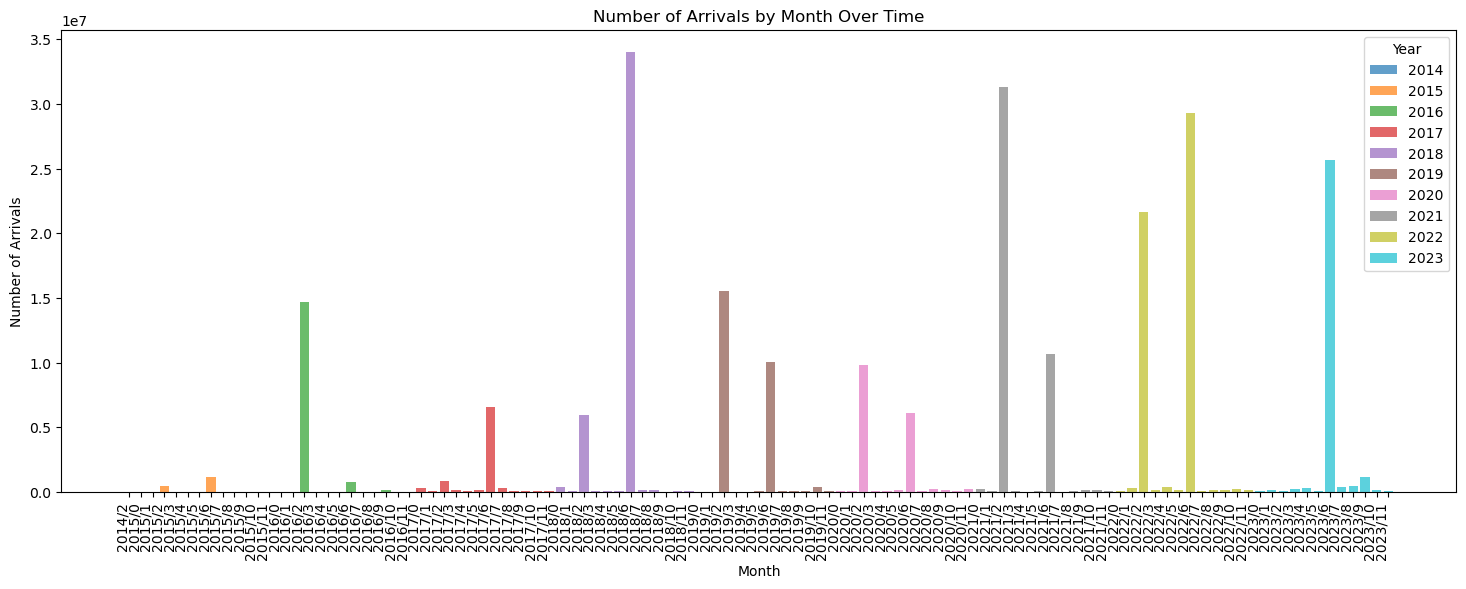

In [21]:
import matplotlib.pyplot as plt
counts = df.groupby(['Year', 'Month'])['Arrivals'].sum().reset_index()
# Set figure size
plt.figure(figsize=(18, 6))

# Combine year and month to create a new column for x-axis
counts['Year-Month'] = counts['Year'].astype(str) + '/' + counts['Month'].astype(str)

# Set x-axis ticks and labels
x_ticks = counts['Year-Month'].unique()
x_labels = counts['Month'].unique()

# Loop through each year and plot the number of orders as bars
for year in counts['Year'].unique():
    year_data = counts[counts['Year'] == year]
    plt.bar(year_data['Year-Month'], year_data['Arrivals'], label=str(year), alpha=0.7)

# Set x-axis ticks and labels
plt.xticks(ticks=range(len(x_ticks)))

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='right')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Number of Arrivals')
plt.title('Number of Arrivals by Month Over Time')
plt.legend(title='Year')

In [24]:
print(counts['Year-Month'], counts['Arrivals'])

# Convert the "Year-Month" column to datetime format
counts['Year-Month'] = pd.to_datetime(counts['Year-Month'], format='%Y-%B')

# Sort the DataFrame by the "Year-Month" column
order_counts_sorted = counts.sort_values('Year-Month')
# Set figure size
plt.figure(figsize=(12, 6))

# Plot the bar plot
plt.plot(order_counts_sorted['Year-Month'], order_counts_sorted['Arrivals'])


0       2014/2
1       2015/0
2       2015/1
3       2015/2
4       2015/3
        ...   
104     2023/7
105     2023/8
106     2023/9
107    2023/10
108    2023/11
Name: Year-Month, Length: 109, dtype: object 0            0.0
1         4651.0
2         5448.0
3       471040.0
4         2940.0
         ...    
104     404640.0
105     450615.0
106    1177460.0
107     124390.0
108      60965.0
Name: Arrivals, Length: 109, dtype: float64


ValueError: time data "2014/2" doesn't match format "%Y/%B", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

We can also visualize how our model does in predicting arrivals. First, we build our best model and calculate the differences between its predictions and the true vales.

In [34]:
# build our best model
train, test = train_test_split(df_dropna_t9, test_size=0.2)
X_train = train.drop(['Arrivals'], axis=1)
y_train = train[['Arrivals']]
X_test = test.drop(['Arrivals'], axis=1)
y_test = test[['Arrivals']]

DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)

preds = DT.predict((X_test))
y_true = y_test.values.flatten()
diffs = preds - y_true

When we plot the differences between our best models predictions and the true values, we can see that the model makes several very large wrong predictions, but that the vast majority are the same or very similar.

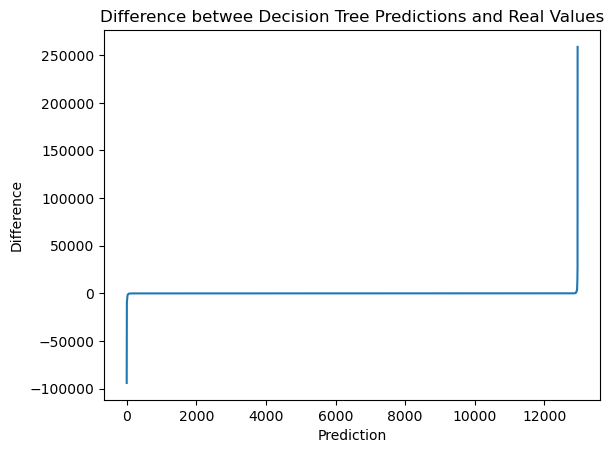

In [29]:
plt.plot(np.sort(diffs))

plt.title("Difference betwee Decision Tree Predictions and Real Values")
plt.xlabel("Prediction")
plt.ylabel("Difference")

plt.show()

When we plot a histogram of these differences, we can further see this. The plot is on a logarithmic x axis, to show the number of mispredictions within one order of magnitude. Only mispredictions of 10 people or more are plotted. This plot shows the relatively few predictions the model made that were off by 10 or more people.

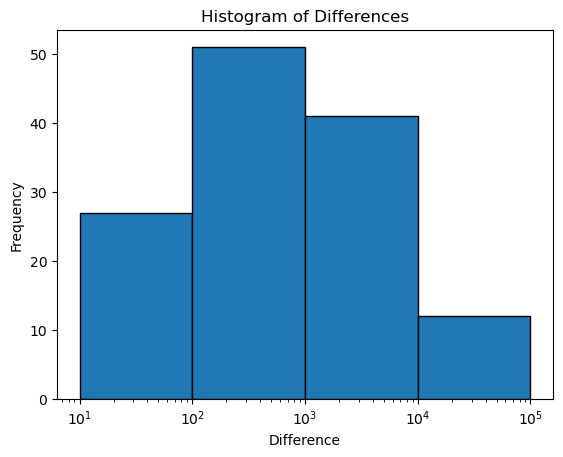

In [42]:
# plot only the differences greater than 100

bins = [10, 100, 1000, 10000, 100000]
plt.hist(diffs, bins=bins, edgecolor='black')
plt.xscale('log')

# Add labels and title
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.title('Histogram of Differences')

plt.show()

Finally, we can calculate the percent of perfect predictions were the model predicted the exact number of arrivals, which it did 98% of the time.

In [43]:
print(f'percent of perfect predictions: {(np.count_nonzero(diffs == 0) / len(diffs))}')

percent of perfect predictions: 0.9810854628271443


# Conclusion

After testing each model on each dataset, we found the following models scored the highest for each metric:

| R<sup>2</sup> | Random Forest on `df_impute` | 0.937 |
|  ------------ | ---------------------------- | ----- |
| RMSE | Random Forest on `df_impute` | 1116.342 |
|  ------------ | ---------------------------- | ----- |
| Classification | Random Forest on `df_impute` | 0.995 |

However, given that `df_impute` contains negative values, which are impossible in the real scenario, and `df_dropna` has only 230 training rows, making the possibility of overfitting high, we believe that neither of these models would give helpful predictions. Instead, we think that a Decision Tree trained on `df_dropna_t9` would be the most useful in a real world scenario, as it would not predict negative values, is sufficiently large that overfitting is less of a worry, and still scores high. This models scores are given below:

| R<sup>2</sup> | Random Forest on `df_impute` | 0.937 |
  ------------- | ---------------------------- | ----- |
| RMSE | Random Forest on `df_impute` | 1116.342 |
|  ------------ | ---------------------------- | ----- |
| Classification | Random Forest on `df_impute` | 0.995 |

Our best model performs exceptionally well on the vast majority of predictions, perfectly predicting the exact number of arrivals 98% of the time. That said, it performs very poorly when trying to predict these large outliers, which is reflected in the high RMSE. If these observations are anomalies in the dataset that we would not reasonably expect to correctly predict given the data available, in other words, caused by some external factor not present in the data (such as a government ordering the evacuation of an area), then this error is not a huge issue. If, on the other hand, these observations are largely explained by the data we have available, then we would want to do better at predicting them. One way we could do this is to try to incentivize our model to be less conservative and make larger predictions. Without knowing more about these specific observations, it is hard to say which is the best course of action.